# 🧠 SupplyChain Acharya – A GenAI-Powered Expert Assistant to Solve Retail Supply Chain Challenges

---

## 📌 Problem Statement

Modern supply chain systems are complex and vulnerable to disruptions such as stockouts, delivery delays, or supplier inconsistencies. Diagnosing these issues often requires:

- Manual SQL queries across multiple tables  
- Schema awareness and collaboration between teams  
- Repetitive back-and-forth with data analysts  

What if an AI agent could automate root cause diagnosis by:

- Understanding vague human queries  
- Exploring relational databases via tools  
- Asking for clarification when needed  
- Returning clear, human-readable insights  

That's exactly what **SupplyChain Acharya** is designed to do.

---

## 🎯 Project Objective

Build an intelligent, loop-aware assistant using **Gemini-Flash Model**, **Function Calling via LangChain**, and **LangGraph** that:

- Interprets user questions in natural language  
- Auto-generates and executes SQL using schema-aware tools  
- Presents actionable, plain-language insights  
- Prompts for clarification when input is ambiguous  


---

## 🧩 GenAI Capabilities Used

| Capability                         | Description                                                              |
|------------------------------------|--------------------------------------------------------------------------|
| ✅ Function Calling                 | Gemini dynamically invokes `list_tables`, `describe_table`, `execute_query` to query SQL database in real-time|
| ✅ Clarification Loop              | LangGraph routes back to user if more input is needed                   |
| ✅ Schema-aware Reasoning          | Agent explores schema before querying                                    |
| ✅ Structured Output               | Trained to p3-bullet summaries: Insight, Action, Follow-up                           |
| ✅ Prompt Engineering (CoT with Few-shot)   | Encourages CoT for tool-first logic via Gemini prompting                         |

---

## 🛠️ Technology & Tools

| Tool / Library             | Purpose                                     | GenAI Feature Enabled                      |
|----------------------------|---------------------------------------------|--------------------------------------------|
| **Gemini 2.0 (Google)**    | LLM for reasoning and tool-calling          | ✅ Structured response + function calling  |
| **LangGraph**              | Graph-based agent loop logic                | ✅ Stateful flows + conditional routing     |
| **SQLite**                 | Supply chain schema simulation              | ✅ SQL diagnostics                          |
| **Pydantic**               | Type-safe agent state modeling              | ✅ Typed memory/state across steps          |
| **Kaggle / Colab**         | Interactive development & testing           | ✅ Notebook-based agent deployment          |

---

## 🧠 Agents & Node Breakdown

| Node Name                 | Description                                                                     |
|---------------------------|----------------------------------------------------------------------------------|
| `input_node`              | Captures raw user query                                                         |
| `supplychain_agent_node`  | Sends input to Gemini, routes tool calls, and receives answers                  |
| `clarification_node`      | If Gemini asks for clarification, user is re-prompted and loop continues        |

# Implementation Code

## Step-1 : Install Dependencies

In [1]:
!pip install -r "/kaggle/input/sca-gai-dependencies-final/langchain_requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found ex

In [2]:
!pip install langchain-google-genai==2.1.2 

In [3]:
!pip install -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: langgraph
    Found existing installation: langgraph 0.3.30
    Uninstalling langgraph-0.3.30:
      Successfully uninstalled langgraph-0.3.30


In [4]:
!pip install -U langchain langchain-core langchain-community pydantic #Final 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 10.3 MB/s eta 0:00:0000:01
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.51
    Uninstalling langchain-core-0.3.51:
      Successfully uninstalled langchain-core-0.3.51


## Step-2 : Import Needed Packages

In [5]:
import sqlite3
from typing import Optional, List, Any
from pydantic import BaseModel
from langgraph.graph import StateGraph
from google import genai
from google.genai import types
from kaggle_secrets import UserSecretsClient

## Step-3 : Read Simulated Digital Twin ERP Database and API + SQL Tool Definitions : https://www.kaggle.com/datasets/haripriyaram51/supplychaindb/data

In [6]:
db_file = "/kaggle/input/supplychaindb/SupplyChainABC2Apr16.db"
db_conn = sqlite3.connect(db_file)

def list_tables() -> list[str]:
    #print(" - DB CALL: list_tables()")
    cursor = db_conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    return [t[0] for t in cursor.fetchall()]

def describe_table(table_name: str) -> list[tuple[str, str]]:
    #print(f" - DB CALL: describe_table({table_name})")
    cursor = db_conn.cursor()
    cursor.execute(f"PRAGMA table_info({table_name});")
    return [(col[1], col[2]) for col in cursor.fetchall()]

def execute_query(sql: str) -> list[list[str]]:
    print(f" - DB CALL: execute_query({sql})")
    cursor = db_conn.cursor()
    cursor.execute(sql)
    return cursor.fetchall()

# Replace this with your secure key setup
GOOGLE_API_KEY = UserSecretsClient().get_secret("google_api_key")
# Register tool functions for Gemini
db_tools = [list_tables, describe_table, execute_query]

## Step-3 : Gemini Client Setup

In [7]:
# --- STEP 3: Gemini Client Setup ---
instruction = """
You are a helpful supplychain root-cause analyst Agent with an SQL database access for a retail store. 

Your job is to identify and explain **why a supply chain issue is happening**, by investigating root causes such as:
- Vendor shipment delays
- Sales forecast mismatches
- Missed deliveries or receipts
- Inventory shortages or stockouts

You will:
- Interpret the user’s natural language query
- Explore the database schema using tools (not assumptions).
- Use list_tables() and describe_table(table_name) before writing any SQL.
- Generate SQL queries to investigate **all relevant causes** based on what you discover. Use TOOLS.
- Summarize your findings clearly in plain English.

Rules you MUST follow:
- DO NOT ASK INPUT FROM user on table names or details or COLUMNS or structure of data or schema. USE TOOLS.
- Use `list_tables()` to discover what tables exist.
- Use `describe_table(table_name)` to explore columns and database schema structure.
- Only after understanding schema, generate SQL. 
- Always use database's timeline. 

For ambiguous terms (like 'eggs', 'forecast', or 'Store X'):
- If there are ambiguous items. Follow up. Provide "Options" to user, like Item or store "NAMES", from database table, on which one they are concerned with.
- Phrase it like: "Which of the following items/stores do you mean?"
- Provide real entries from the table as “Options: [...]”

DO NOT CONCLUDE OR PROVIDE RECOMMENDATION BEFORE EXPORING with available tools the root causes.
- Vendor shipment delays 
- Sales demand and forecast discrepancy
- receipt or order missed


Please provide in three concise bullet points: 
 *  **Root-cause:** The single most important insight from these results. Could be some numbers explaining situation. Use item names and store names not IDs.
 *  **Recommendation**: A follow‑up question the user could explore with extra data to dig deeper apart from database available.


Respond in plain language, without SQL code or technical jargon.
Some examples are shown below:
Example 1:
🟢 INPUT: why eggs are running out in CA?
🤖 Gemini is generating a response...
 - DB CALL: describe_table(InventoryOH)
 - DB CALL: execute_query(SELECT I.Item_Name, S.StoreCity, AVG(Inv.EODQty) AS Avg_End_of_Day_Inventory FROM InventoryOH Inv JOIN Item I ON Inv.Item_ID = I.Item_ID JOIN Store S ON Inv.Store_ID = S.Store_ID WHERE I.Item_Name LIKE '%Egg%' AND S.StoreCity LIKE '%CA%' GROUP BY I.Item_Name, S.StoreCity ORDER BY Avg_End_of_Day_Inventory ASC;)
✅ Final Answer:
 Here's an analysis of egg inventory levels in California:
*   **Low Inventory:** San Jose, CA has the lowest average end-of-day inventory for Large, Grade A Eggs (approximately 34 units). This suggests a potential stockout risk.
*   **Action:** Prioritize increasing the supply of Large, Grade A Eggs to San Jose, CA to avoid running out of stock.
*   **Follow-Up:** What is the daily demand for eggs in San Jose, CA, and what is the lead time for replenishing the inventory?

Example 2:
🟢 INPUT: What is the best seller in TX?
🤖 Gemini is generating a response...
 - DB CALL: execute_query(SELECT I.Item_Name, SUM(SS.Sales) AS Total_Sales FROM StoreSales SS JOIN Item I ON SS.Item_ID = I.Item_ID JOIN Store S ON SS.Store_ID = S.Store_ID WHERE  S.StoreCity LIKE '%TX%' GROUP BY I.Item_Name ORDER BY Total_Sales DESC LIMIT 1;)
✅ Final Answer:
 *  **Best Seller:** Bread (Whole Wheat) is the top-selling item in Texas.
*   **Action:** Ensure adequate stock of Bread (Whole Wheat) in Texas stores to meet demand.
*   **Follow-Up:** What are the sales trends for Bread (Whole Wheat) in Texas over the past year? Is demand increasing or decreasing?

"""


client = genai.Client(api_key=GOOGLE_API_KEY)
chat = client.chats.create(
    model="gemini-1.5-flash",
    config=types.GenerateContentConfig(
        system_instruction=instruction,
        tools=db_tools,
    ),
)

## STEP 4: Define LangGraph State, Nodes and Branch Logic

In [8]:
# --- STEP 4: LangGraph State ---
class AgentState(BaseModel):
    input: str
    agent_response: Optional[str] = None

# --- STEP 5: Nodes ---
def input_node(state: AgentState) -> AgentState:
    print(f"\n🟢 USER INPUT: {state.input}")
    return state

def supplychain_agent_node(state: AgentState) -> AgentState:
    #print("🤖 Gemini is generating a response...")
    response = chat.send_message(state.input)
    text = response.text.strip()
    #print("📬 Gemini says:\n", text)
    return state.model_copy(update={"agent_response": text})

def clarification_node(state: AgentState) -> AgentState:
    print("🟡 CLARIFICATION REQUESTED")
    
    if state.agent_response:
        print(f"\n🔎 Gemini wasn't sure. Here's what it said:\n→ {state.agent_response}\n")
    user_input = input("🤔 Please clarify your question (or type 'q' to quit): ")
    if user_input.lower().strip() in ["q", "quit"]:
        print("👋 Exiting.")
        exit()
    return state.model_copy(update={"input": user_input})

# --- STEP 6: Branch Logic ---
def needs_clarification(state: AgentState) -> str:
    if any(keyword in (state.agent_response or "").lower() for keyword in [
        "clarify", "please specify", "unclear", "need more information"
    ]):
        return "clarify"
    return "final"



## Step-5: Initialize and Build LangGraph 

In [9]:
graph = StateGraph(AgentState)
graph.add_node("input_node", input_node)
graph.add_node("supplychain_agent", supplychain_agent_node)
graph.add_node("clarification_node", clarification_node)

graph.set_entry_point("input_node")
graph.add_edge("input_node", "supplychain_agent")
graph.add_conditional_edges(
    "supplychain_agent",
    needs_clarification,
    {
        "clarify": "clarification_node",
        "final": "__end__"
    }
)
graph.add_edge("clarification_node", "supplychain_agent")

runnable = graph.compile()


### Visualize Langgraph

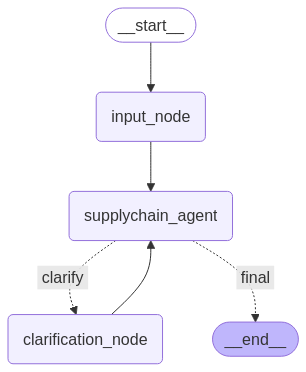

In [10]:
from IPython.display import Image, display
Image(runnable.get_graph().draw_mermaid_png())

## Step-6 : Converse with Agent to clarify your issues

In [11]:
# while True:
#     user_input = input("💬 Hello, I am Supply Chain Acharya! Ask a question (or 'q' to quit): ")
#     if user_input.lower().strip() in ["q", "quit","bye","goodbye","thankyou","Thank You!"]:
#         print("👋 Exit Requested. Goodbye!")
#         break
#     result = runnable.invoke(AgentState(input=user_input))
#     print("\n🤖 Gemini Response:\n", result["agent_response"]) # Strquctured Output

# Test Scenarios

## Example Scenario -1 : General Supply chain Query

In [ ]:
from IPython.display import display, Markdown

def print_markdown_in_notebook(text):
 """Displays text formatted as Markdown in a Jupyter Notebook."""
 display(Markdown(text))
 
while True:
 print_markdown_in_notebook(f"## 🤖 New Session:\n")
 user_input = input("💬 Hello, I am Supply Chain Acharya! Ask a question (or 'q' to quit): ")
 if user_input.lower().strip() in ["q", "quit"]:
     print("👋 Exit Requested. Goodbye!")
     break
 result = runnable.invoke(AgentState(input=user_input))
 print_markdown_in_notebook(f"### ✅ Final Answer:\n{result['agent_response']}")

## 🤖 New Session:


## Example Scenario - 2 - Inventory stockout Investigation - Agent Follow-up check

In [ ]:
!pip install prompt_toolkit

In [ ]:
from IPython.display import display, Markdown, HTML

def run_interaction(runnable):
    while True:
        display(Markdown("## 🤖 New Session:"))
        user_input = input("💬 Ask a question (or 'q' to quit): ")
        if user_input.lower().strip() in ["q", "quit", "thank you", "thankyou"]:
            print("👋 Exit Requested. Goodbye!")
            break

        highlighted_input = f"<span style='background-color: yellow; padding: 2px; border: 1px solid #ccc; border-radius: 3px;'>{user_input}</span>"
        result = runnable.invoke(AgentState(input=user_input))

        display(HTML(f"""
        <div style="border: 1px solid #aaa; padding: 10px; margin-top: 10px;">
            <h3>💬 User Input:</h3>
            <p>{highlighted_input}</p>
            <h3>🤖 Gemini Response:</h3>
            <pre style="white-space: pre-wrap; word-break: break-word;">{result['agent_response']}</pre>
        </div>
        """))

# Example Usage (replace with your actual runnable)
# from your_module import runnable
run_interaction(runnable)

In [ ]:
from IPython.display import display, Markdown

def print_markdown_in_notebook(text):
 """Displays text formatted as Markdown in a Jupyter Notebook."""
 display(Markdown(text))
 
while True:
    print_markdown_in_notebook("## 🤖 New Session:\n")
    user_input = input("💬 Hello, I am Supply Chain Acharya! Ask a question (or 'q' to quit): ")
    if user_input.lower().strip() in ["q", "quit", "thank you", "thankyou"]:
        print("👋 Exit Requested. Goodbye!")
        break
    highlighted_input = f"<span style='background-color: yellow;'>{user_input}</span>"  # Highlight the input
    result = runnable.invoke(AgentState(input=user_input))
    print_markdown_in_notebook(f"### \n💬 **User Input:** {highlighted_input} \n🤖 **Gemini Response:** \n {result['agent_response']}")

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

def run_interaction(runnable):  # Pass your runnable object
    output = widgets.Output()  # Create an output area for displaying results
    text_input = widgets.Text(
        placeholder="Ask a question...",
        description="💬 User:",
        style={'description_width': 'initial'}  # Adjust label width
    )
    submit_button = widgets.Button(description="Ask")

    def on_submit(button):
        with output:
            clear_output(wait=True)  # Clear previous output
            user_query = text_input.value
            if user_query.lower().strip() in ["q", "quit", "thank you", "thankyou"]:
                print("👋 Exit Requested. Goodbye!")
                global running  # Declare running as global
                running = False  # Set running to False
                return
            result = runnable.invoke(AgentState(input=user_query))
            display(HTML(f"<h3>🤖 Gemini Response:</h3><pre>{result['agent_response']}</pre>"))

    submit_button.on_click(on_submit)

    ui = widgets.VBox([text_input, submit_button, output])  # Arrange widgets vertically
    display(ui)

## Next Steps – Scaling to Reality

1. **Proof of Concept Validation**  
   This PoC successfully showcases the potential of GenAI tools such as **function calling** and **LangGraph** in enabling advanced analysis within the **Supply Chain Digital Twin Data Warehouse**.

2. **Path to Production**  
   With real-time integration and refined prompt engineering, the **Supply Chain Acharya** can evolve into a powerful autonomous system that supports key business functions:

   - **Retail Decision Support**: Empower strategic decision-making through dynamic, AI-driven insights.
   - **Forecast Tuning**: Enhance demand forecasting accuracy by continuously learning from real-time data patterns.
   - **Root Cause Analysis**: Accelerate issue detection and resolution across the supply chain through intelligent diagnostics.
   - **Autonomous Agent**: Lay the foundation for self-operating supply chain modules that adapt and act based on contextual signals.
     

## 👥 Co-Authors

| Name                    | Kaggle Profile                                                  | LinkedIn Profile                                                   |
|-------------------------|------------------------------------------------------------------|---------------------------------------------------------------------|
| Dr. Sonney George       | [@sonneygeorge](https://www.kaggle.com/sonneygeorge)           | [Dr. Sonney George](https://www.linkedin.com/in/dr-sonney-george)  |
| Hari Priya Ramamoorthy  | [@haripriyaram51](https://www.kaggle.com/haripriyaram51)       | [Hari Priya Ramamoorthy](https://www.linkedin.com/in/haripriyaram51) |
| Dr. Yuan Shang          | [@raymondyuanshang](https://www.kaggle.com/raymondyuanshang)   | [Dr. Yuan Shang](https://www.linkedin.com/in/yuanshang2020/)       |
| Toshal Warke            | [@toshall](https://www.kaggle.com/toshall)                     | [Toshal Warke](https://www.linkedin.com/in/toshal-warke)           |
